# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1:</center>
### <center>  Propiedades en Venta</center>
### <center>  Grupo 18</center>


#### **Integrantes:**

* Analía Acevedo
* Santiago Daniel Marczewski Neudeck
* Lucia Belén Napoli
* Brayan Ricaldi

In [28]:
import pandas as pd
import numpy as np

#Visualización
import seaborn as sns
import matplotlib.pyplot as plt
import dtreeviz.trees as dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score
from sklearn.metrics import make_scorer

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as skp
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score
from sklearn import tree
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
from preprocessing import preprocesamiento

pd.options.display.max_columns = None

In [2]:
_x_train = pd.read_csv('./DataSet/x_train')
_x_train.drop(columns=['Unnamed: 0'],inplace=True)
_y_train = pd.read_csv('./DataSet/y_train')
_y_train.drop(columns=['Unnamed: 0'],inplace=True)
_x_test = pd.read_csv('./DataSet/x_test')
_x_test.drop(columns=['Unnamed: 0'],inplace=True)
_y_test = pd.read_csv('./DataSet/y_test')
_y_test.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
x_train = _x_train.copy()
y_train = _y_train.copy()
x_test = _x_test.copy()
y_test = _y_test.copy()

# Clasificacion

**a) Construcción del target**

Para esta tarea se debe crear una nueva variable ***tipo_precio*** que tendrá tres categorías:
**alto**, **medio**, **bajo**. Esta nueva variable será nuestra clase en el problema de clasificación.
Para determinar cuándo el tipo_precio de una propiedad es alto, medio o bajo se deberá
analizar el precio por metro cuadrado (pxm2). Se propone evaluar las siguientes
alternativas para establecer los límites de cada categoría:

1. Dividir la variable *pxm2* en 3 intervalos con igual cantidad de observaciones.
2. Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones,
el siguiente con el 50% y el último con el 25% de las observaciones restantes.
3. Trabajar la variable pxm2 relativa a cada tipo de propiedad y luego dividirla como en
el punto anterior.

Se pide:
* Mostrar la distribución del precio por metro cuadrado(ESTA EN PREPROCESAMIENTO)
* Mostrar la distribución del precio por metro cuadrado por tipo de propiedad (ESTA EN PREPROCESAMIENTO)
* Para cada una de las tres alternativas mostrar gráficamente la distribución de la
nueva variable creada *tipo_precio*.
* Seleccionar una de las alternativas, justificando la misma.
* Comparar, si aplica, la alternativa seleccionada con la división en 3 grupos obtenida
utilizando agrupamiento por K Means.
* Mostrar en un mapa de CABA los avisos coloreados por *tipo_precio*

In [4]:
df_discret = pd.DataFrame(data=y_train['0'].array, columns=['pxm2'])

### Dividir la variable *pxm2* en 3 intervalos con igual cantidad de observaciones.

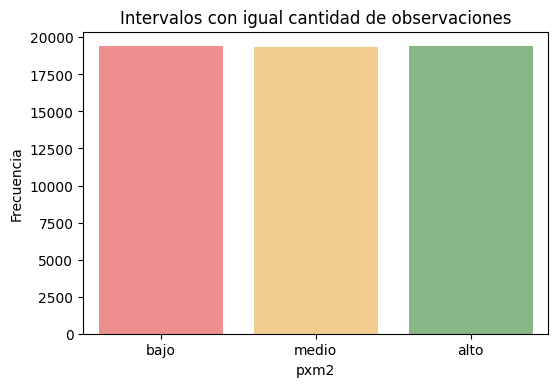

In [5]:
plt.figure(dpi=100)
labels=["bajo","medio","alto"]

df_discret["pxm2_discret_igual_frec"]=pd.qcut(df_discret["pxm2"],q=3, labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_pxm2=df_discret.groupby(['pxm2_discret_igual_frec']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_pxm2.index.tolist()    ## Declaramos valores para el eje x
eje_y = ds_agrupado_pxm2['pxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_pxm2 ,alpha=0.5, palette=['red','orange','green']).set(title="Intervalos con igual cantidad de observaciones",ylabel='Frecuencia',xlabel='pxm2')
plt.show()

### Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones, el siguiente con el 50% y el último con el 25% de las observaciones restantes.

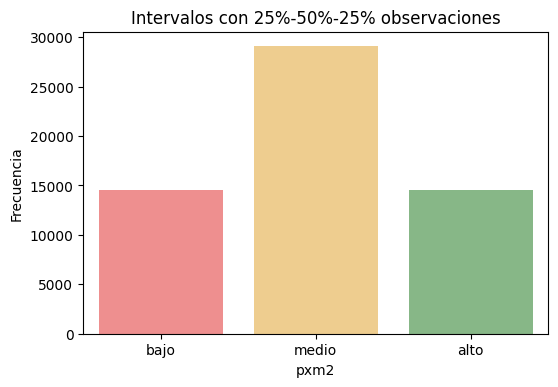

In [6]:
plt.figure(dpi=100)
labels=["bajo","medio","alto"]

df_discret["pxm2_discret_igual_frec"]=pd.qcut(df_discret["pxm2"],q=[0,0.25,0.75,1], labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_pxm2=df_discret.groupby(['pxm2_discret_igual_frec']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_pxm2.index.tolist()    ## Declaramos valores para el eje x
eje_y = ds_agrupado_pxm2['pxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_pxm2 ,alpha=0.5,palette=['red','orange','green']).set(title="Intervalos con 25%-50%-25% observaciones",ylabel='Frecuencia',xlabel='pxm2')
plt.show()

### Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones, el siguiente con el 50% y el último con el 25% de las observaciones restantes.

In [7]:
df_pxm2 = x_train.copy()
df_pxm2['Casa'] = df_pxm2['Departamento'] + df_pxm2['PH']
df_pxm2.Casa.replace(({float(1): 0, float(0): 1, float(2): 0}), inplace=True)

In [8]:
#Recreo la variable tipo para poder graficar
tipo = []
for index, row in df_pxm2.iterrows():
    if(row['PH']): tipo.append('PH')
    if(row['Casa']): tipo.append('Casa')
    if(row['Departamento']): tipo.append('Departamento')
df_pxm2['tipo'] = tipo

In [9]:
#Recreo la variable pxm2 para visualizarla
df_pxm2['pxm2'] = y_train

In [12]:
# Tipo de propiedad
df_depto = df_pxm2.copy()
idx_depto = df_depto[df_depto.tipo.apply(lambda t: t != "Departamento")].index
df_depto.drop(idx_depto, inplace=True)
df_depto.reset_index(drop=True, inplace=True)
df_discret_depto=df_depto.loc[:,'pxm2'].to_frame()

df_ph = df_pxm2.copy()
idx_ph = df_ph[df_ph.tipo.apply(lambda t: t != "PH")].index
df_ph.drop(idx_ph, inplace=True)
df_ph.reset_index(drop=True, inplace=True)
df_discret_ph=df_ph.loc[:,'pxm2'].to_frame()

df_casa = df_pxm2.copy()
idx_casa = df_casa[df_casa.tipo.apply(lambda t: t != "Casa")].index
df_casa.drop(idx_casa, inplace=True)
df_casa.reset_index(drop=True, inplace=True)
df_discret_casa=df_casa.loc[:,'pxm2'].to_frame()

Text(0.5, 1.0, 'Casa')

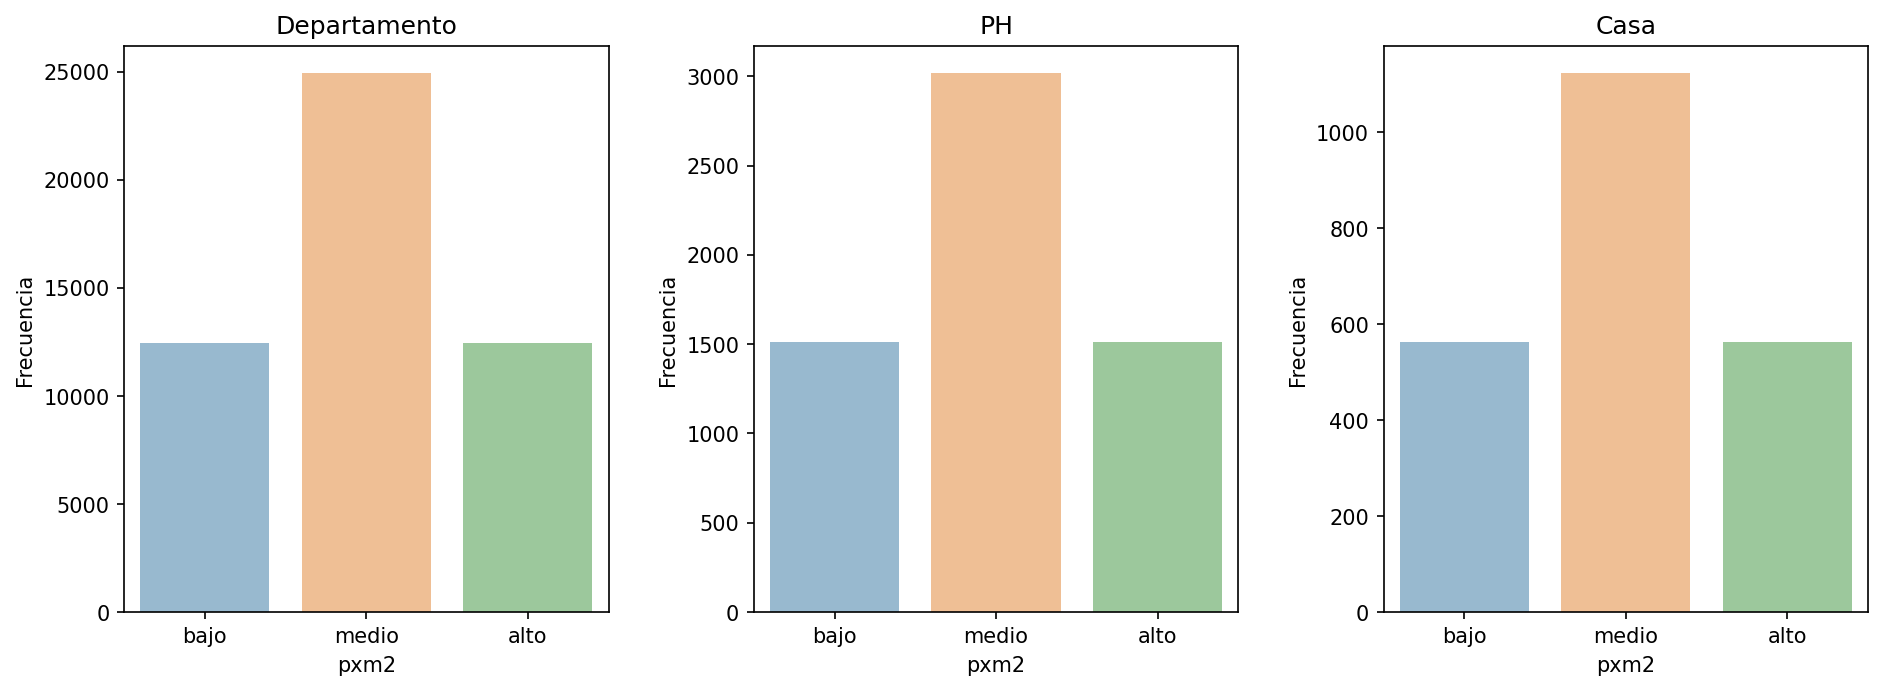

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=150, figsize=(15, 5))

labels=["bajo","medio","alto"]

df_discret_depto["pxm2_discret_igual_frec"]=pd.qcut(df_discret_depto["pxm2"],q=[0,0.25,0.75,1], labels=labels)
ds_agrupado0=df_discret_depto.groupby(['pxm2_discret_igual_frec']).count()
eje_x0 = ds_agrupado0.index.tolist()
eje_y0 = ds_agrupado0['pxm2'].tolist()
sns.barplot(x=eje_x0, y=eje_y0, data=ds_agrupado0 ,alpha=0.5,ax=axes[0]).set(ylabel='Frecuencia',xlabel='pxm2')

df_ph["pxm2_discret_igual_frec"]=pd.qcut(df_ph["pxm2"],q=[0,0.25,0.75,1], labels=labels)
ds_agrupado1=df_ph.groupby(['pxm2_discret_igual_frec']).count()
eje_x1 = ds_agrupado1.index.tolist()
eje_y1 = ds_agrupado1['pxm2'].tolist()
sns.barplot(x=eje_x1, y=eje_y1, data=ds_agrupado1 ,alpha=0.5,ax=axes[1]).set(ylabel='Frecuencia',xlabel='pxm2')

df_casa["pxm2_discret_igual_frec"]=pd.qcut(df_casa["pxm2"],q=[0,0.25,0.75,1], labels=labels)
ds_agrupado2=df_casa.groupby(['pxm2_discret_igual_frec']).count()
eje_x2 = ds_agrupado2.index.tolist()
eje_y2 = ds_agrupado2['pxm2'].tolist()
sns.barplot(x=eje_x2, y=eje_y2, data=ds_agrupado2 ,alpha=0.5,ax=axes[2]).set(ylabel='Frecuencia',xlabel='pxm2')


plt.subplots_adjust(wspace=0.3)
axes[0].set_title("Departamento")
axes[1].set_title("PH")
axes[2].set_title("Casa")

## Conclusión
Elegimos la 2da opcion porque es comun en el dia a dia ver mas propiedades con el costo medio que alto o bajo. Es algo que mas se ve en nuestra realidad.

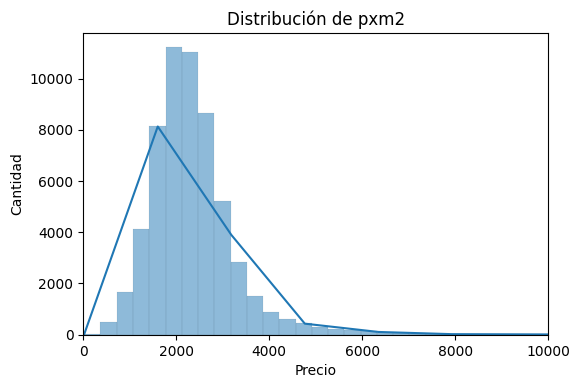

In [14]:
plt.figure(dpi=100)
h_pxm2 = sns.histplot(df_discret["pxm2"], 
                  bins=900, 
                  kde=True)
h_pxm2 = h_pxm2.set(
    title="Distribución de pxm2",
    xlim=(0, 10000),
    xlabel="Precio",
    ylabel="Cantidad",
)

### Mapa de CABA

In [15]:
import geopandas as geopd

In [16]:
dp_comunas = geopd.read_file("./comunas.csv")
df_comunas = dp_comunas.copy()

In [18]:
# Tomamos solamente las columnas que necesitamos
df_comunas=df_comunas.filter(['COMUNAS','geometry'])
df_comunas.rename(columns={'COMUNAS':'comuna'},inplace=True)
# Casteamos las comunas a enteros para mayor comodidad
df_comunas['comuna']=df_comunas.comuna.astype(float)
df_comunas['comuna']=df_comunas.comuna.astype(int)

In [19]:
df_discret = pd.DataFrame(data=y_train['0'].array, columns=['pxm2'])

labels=["bajo","medio","alto"]

df_mapa = x_train.copy()

df_mapa["tipo_precio"]=pd.qcut(df_discret["pxm2"],q=[0,0.25,0.75,1], labels=labels)

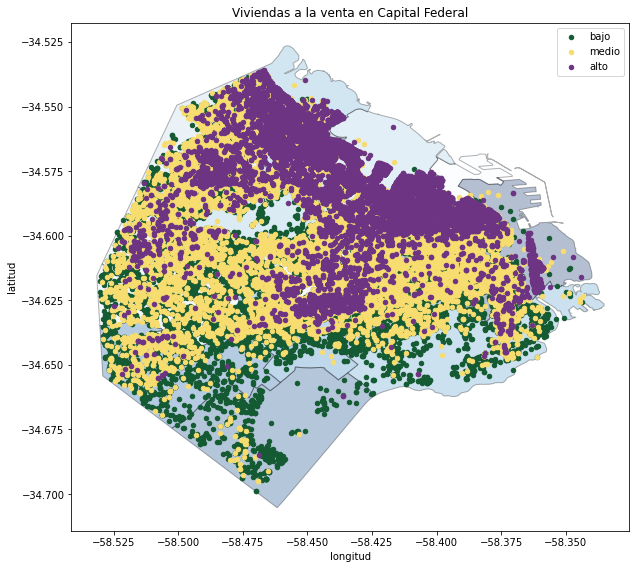

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
df_comunas.plot(ax=ax,alpha=0.3, facecolor='Grey',edgecolor='k', linewidth=1, cmap='Blues').set(title='Viviendas a la venta en Capital Federal')

colors = {'bajo':'#145A32', 'alto':'#6C3483', 'medio':'#F7DC6F'}

grouped = df_mapa.groupby('tipo_precio')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='longitud', y='latitud', label=key, color=colors[key])

plt.show()

In [21]:
_x_train = pd.read_csv('./DataSet-Modificados/ZSCORE-PCA/x_train')
_x_train.drop(columns=['Unnamed: 0'],inplace=True)
_y_train = pd.read_csv('./DataSet-Modificados/ZSCORE-PCA/y_train')
_y_train.drop(columns=['Unnamed: 0'],inplace=True)
_x_test = pd.read_csv('./DataSet-Modificados/ZSCORE-PCA/x_test')
_x_test.drop(columns=['Unnamed: 0'],inplace=True)
_y_test = pd.read_csv('./DataSet-Modificados/ZSCORE-PCA/y_test')
_y_test.drop(columns=['Unnamed: 0'],inplace=True)
_y_train.rename(columns={'0':'pxm2'}, inplace=True)
_y_test.rename(columns={'0':'pxm2'}, inplace=True)

In [22]:
#Ejecutare mis modelos con una copia
x_train = _x_train.copy()
y_train = _y_train.copy()
x_test = _x_test.copy()
y_test = _y_test.copy()

Clasifico mi target respecto a la 2da opcion

In [23]:
labels=["bajo","medio","alto"]
new_target_train, bins = pd.qcut(y_train['pxm2'],q=[0,0.25,0.75,1], labels=labels, retbins=True)

Reflejo la clasificacion en el test

In [24]:
bins[0] = min(y_test['pxm2']) - 1
bins[3] = max(y_test['pxm2']) + 1

In [25]:
new_target_test = pd.cut(y_test['pxm2'], bins=bins, labels=labels, include_lowest=True)

In [26]:
y_train = new_target_train
y_test = new_target_test

**b) Entrenamiento y Predicción**
​
Predecir el valor del atributo **tipo_precio**, excluyendo del entrenamiento la variable price,
**pxm2** y cualquier otra que pueda contener información del precio de venta. Para todos los
modelos se pide:
* Realizar las tareas de ingeniería de características necesarias para trabajar con
cada algoritmo (*encoding*, normalización, etc)
* Todos los modelos deben ser entrenados también con el *dataset* generado en el
punto **1 d)**
​

In [ ]:
#Ya lo hemos hecho en los pasos anteriores

### Modelo 1 : Árbol de decisión

a. Construir un árbol de decisión y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Graficar el árbol de decisión con mejor performance encontrado en el punto
anterior. Si es muy extenso mostrar una porción representativa.

c. Analizar el árbol de decisión seleccionado describiendo los atributos elegidos, y
decisiones evaluadas (explicar las primeras reglas obtenidas).

d. Evaluar la performance del árbol en el conjunto de evaluación, explicar todas las
métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [52]:
#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 58161
# Datos Prueba: 14541
% Positivos Entrenamiento: 25.020
% Positivos Prueba: 25.597


**Búsqueda de hiperparámetros y árbol de decisión**

Se optimizan los hiperparámetros del dataset mediante k-fold Cross Validation para obtener la mejor performance.

In [53]:
##KFOLD CV Random Search para buscar el mejor arbol
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que queremos probar
n=20 

#Conjunto de parámetros que queremos usar
params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.05,n), 
               'max_depth':list(range(1,6))}
                
#Cantidad de splits para el Cross Validation, puedo evaluar luego con 10
folds=20

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Generamos un Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que queremos optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n) 

#Buscamos los hiperparametros que optimizan F1 Score
randomcv.fit(x_train,y_train);

NameError: name 'sk' is not defined

In [54]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'max_depth': 3, 'criterion': 'entropy', 'ccp_alpha': 0.005263157894736842}
0.603084567034054


In [55]:
#Atributos considerados y su importancia para la prediccion
best_tree = randomcv.best_estimator_
features=['latitud','longitud','ambientes','dormitorios','superficie_cubierta','comuna']
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,features)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

latitud: 0.02307424120054028
dormitorios: 0.040641308293523845
longitud: 0.16846854997526398
superficie_cubierta: 0.2464199027688993
ambientes: 0.5213959977617727


Vamos a predecir y evaluar el modelo con mejores hiperparametros

In [56]:
#Creo el árbol con los mejores hiperparámetros obtenidos previamente, en este caso ambientes y superficie_cubierta
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol.fit(x_train,y_train)

reglas = export_text(arbol, feature_names=list(features))
print(reglas)

|--- ambientes <= -0.47
|   |--- longitud <= -1.75
|   |   |--- dormitorios <= 0.29
|   |   |   |--- class: medio
|   |   |--- dormitorios >  0.29
|   |   |   |--- class: alto
|   |--- longitud >  -1.75
|   |   |--- ambientes <= -0.82
|   |   |   |--- class: alto
|   |   |--- ambientes >  -0.82
|   |   |   |--- class: medio
|--- ambientes >  -0.47
|   |--- superficie_cubierta <= 0.50
|   |   |--- latitud <= 0.06
|   |   |   |--- class: bajo
|   |   |--- latitud >  0.06
|   |   |   |--- class: bajo
|   |--- superficie_cubierta >  0.50
|   |   |--- longitud <= -1.14
|   |   |   |--- class: bajo
|   |   |--- longitud >  -1.14
|   |   |   |--- class: medio



In [67]:
#Pendiente resolucion de path para graficar arbol
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=['bajo','medio','alto'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

F1-Score: [0.47520799 0.59063023 0.64603774]


Text(33.0, 0.5, 'True')

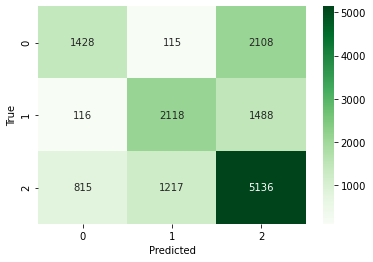

In [72]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= arbol.predict(x_test)

#Arbol Reporte y Matriz de Confusion
#print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average= None))) 

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Greens',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [59]:
arbol.predict_proba(x_test)[0:10]

array([[0.01882399, 0.78924898, 0.19192703],
       [0.01882399, 0.78924898, 0.19192703],
       [0.59480826, 0.04530973, 0.35988201],
       [0.17448633, 0.19209803, 0.63341565],
       [0.17448633, 0.19209803, 0.63341565],
       [0.59480826, 0.04530973, 0.35988201],
       [0.17448633, 0.19209803, 0.63341565],
       [0.17448633, 0.19209803, 0.63341565],
       [0.17448633, 0.19209803, 0.63341565],
       [0.17448633, 0.19209803, 0.63341565]])

In [60]:
#Grafico Boxplot -Entrenado con 20 Fold Cross Validation --pendiente resolucion de error

metric_labelsCV = ['F1 Score']*len(metricsCV) 
sns.set_context('talk')
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
sns.boxplot(metric_labelsCV,metricsCV)

NameError: name 'metricsCV' is not defined

Analicemos el comportamiento de las metricas entrenando el arbol con cada split de un Cross Validation

In [69]:
#Entrenamiento con 10 Fold CV
from sklearn.model_selection import cross_validate, StratifiedKFold

# Splits que respeten la proporción de las clases
kfoldcv =StratifiedKFold(n_splits=10) 
 
#Creo árbol con los mejores hiperparámetros 
arbolcv=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Selecciono métrica F1-Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#Hago CV
resultados = cross_validate(arbolcv,x_train, y_train, cv=kfoldcv,scoring=scorer_fn,return_estimator=True)

#Selecciono el arbol con mejor performance
metricsCV=resultados['test_score']
mejor_performance=resultados['estimator'][np.where(metricsCV==max(metricsCV))[0][0]]

NameError: name 'sk' is not defined

In [62]:
#Veamos las métricas de cada split
metricsCV

NameError: name 'metricsCV' is not defined

In [ ]:
# Veamos en un grafico Boxplot entrenado con 10 Fold Cross Validation

metric_labelsCV = ['F1 Score']*len(metricsCV) 
sns.set_context('talk')
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
sns.boxplot(metric_labelsCV,metricsCV)

In [63]:
#Grafico
dot_data = StringIO()
export_graphviz(mejor_performance, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=['bajo','medio','alto'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'mejor_performance' is not defined

In [64]:
#Arbol CV set de evaluación

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

#Predicción sobre el set de evaluacion
y_pred= mejor_performance.predict(x_test)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Green',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

NameError: name 'mejor_performance' is not defined

### Modelo 2: Random Forest

a. Construir un clasificador RF y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Analizar la importancia de los atributos

c. Mostrar la conformación final de uno de los árboles generados. Si es muy
extenso mostrar una porción representativa y explicar las primeras reglas.

d. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [29]:
#Grilla de Parámetros
params_grid={ 'n_estimators':range(30,50), 
              'max_features':['sqrt','log2'],
              'criterion':['gini', 'entropy'],
              'min_samples_leaf':range(1,5), 
              'min_samples_split':range(2,5)
             }

#Clasificador Random Forest Classifier
rfc = RandomForestClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(rfc, params_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)

rand.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 5),
                                        'n_estimators': range(30, 50)},
                   random_state=5, scoring='accuracy')

In [30]:
rand.cv_results_['mean_test_score']

array([0.69754649, 0.69362643, 0.69623977, 0.69113335, 0.69094416,
       0.6965493 , 0.69017045, 0.69474398, 0.69577564, 0.6928183 ])

In [31]:
print("Los mejores hiperparametros son: ")
print(rand.best_params_)
print("La mejor métrica obtenida es: ")
print(rand.best_score_)

Los mejores hiperparametros son: 
{'n_estimators': 46, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'criterion': 'entropy'}
La mejor métrica obtenida es: 
0.6975464854353045


In [32]:
#Mejor estimador
best_rfc=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_rfc.predict(x_test)

#Accuracy test
accuracy_score(y_test,y_pred)

0.6971322467505674

In [39]:
clases = best_rfc.classes_
print("0: ", clases[0])
print("1: ", clases[1])
print("2: ", clases[2])

0:  alto
1:  bajo
2:  medio


              precision    recall  f1-score   support

        alto       0.71      0.61      0.66      3651
        bajo       0.73      0.65      0.69      3722
       medio       0.68      0.76      0.72      7168

    accuracy                           0.70     14541
   macro avg       0.71      0.68      0.69     14541
weighted avg       0.70      0.70      0.70     14541



Text(33.0, 0.5, 'True')

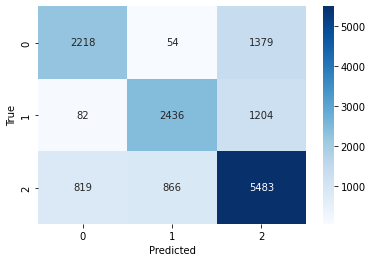

In [33]:
#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [34]:
best_rfc.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=1217422164)

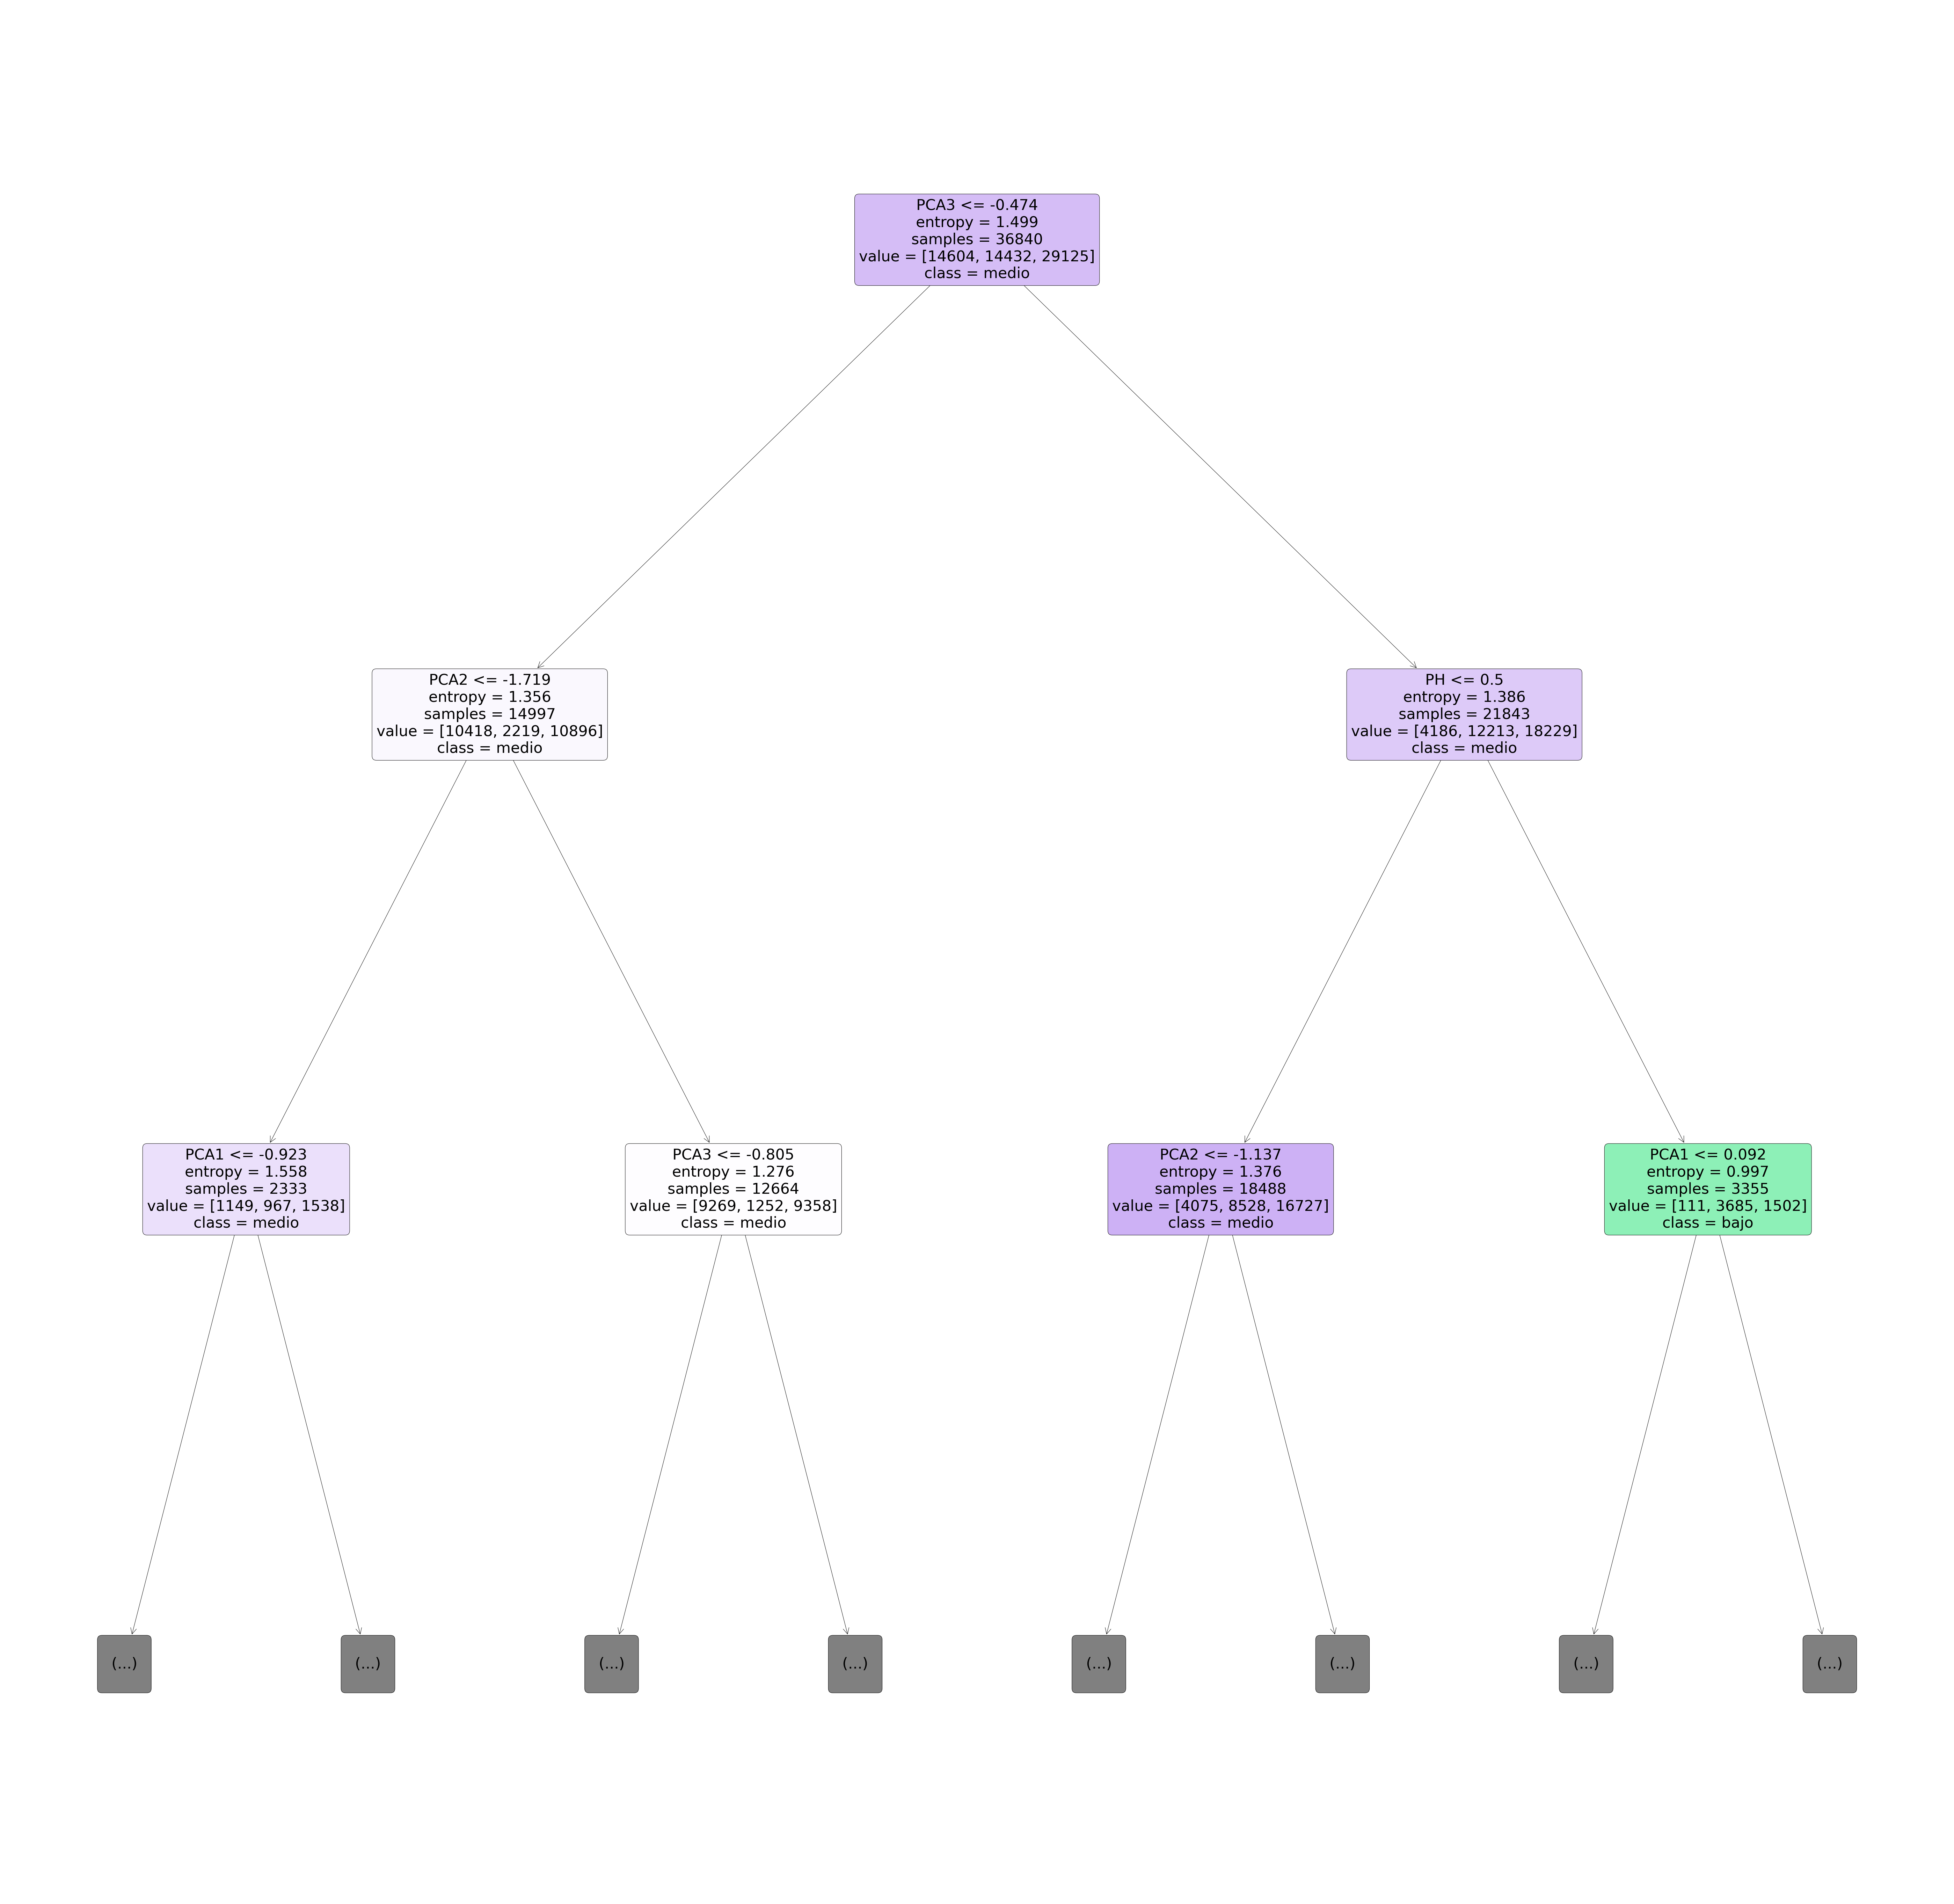

In [35]:
plt.figure(figsize=(100,100))

tree_plot=tree.plot_tree(best_rfc.estimators_[0],
                         max_depth=2,
                         feature_names=x_train.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=['alto', 'bajo', 'medio'])

plt.show(tree_plot)

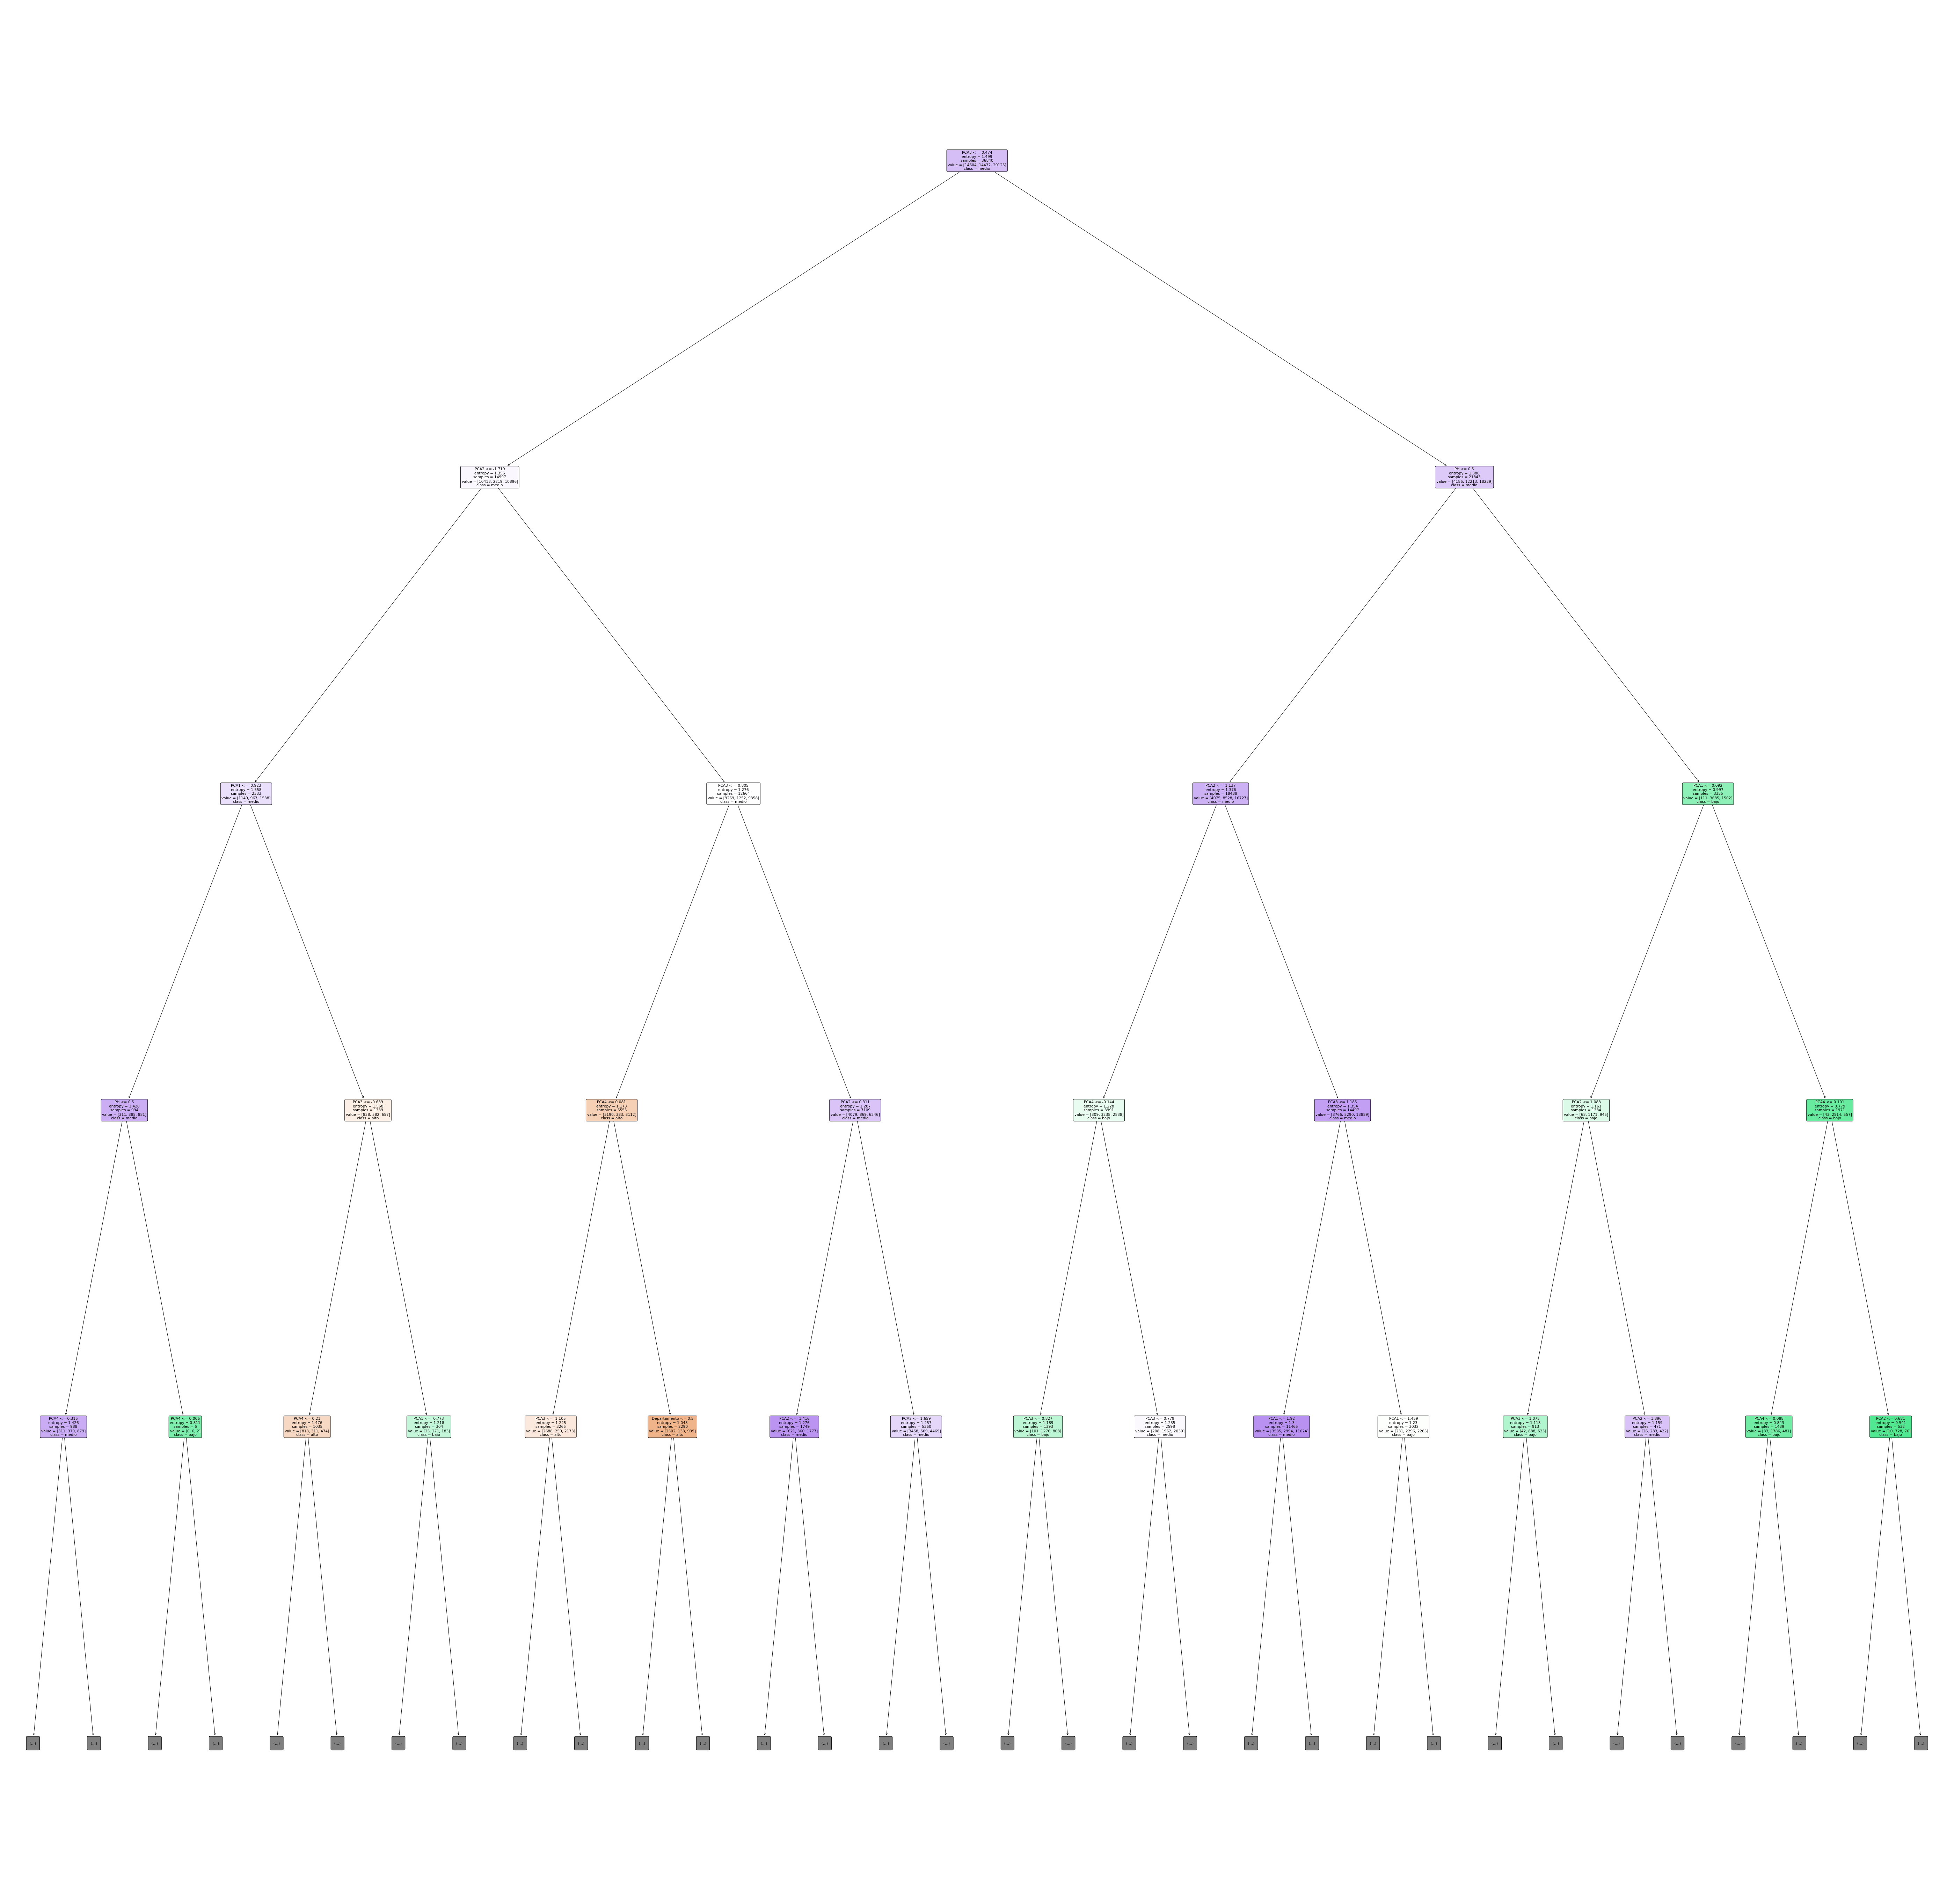

In [36]:
plt.figure(figsize=(100,100))

tree_plot2=tree.plot_tree(best_rfc.estimators_[0],
                         max_depth=4,
                         feature_names=x_train.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=['alto', 'bajo', 'medio'])

plt.show(tree_plot2)

### Modelo 3: a elección

a. En este punto se debe entrenar (mediante cross-validation) un modelo elegido
por el grupo. Se debe evaluar su performance en entrenamiento y sobre el
conjunto de evaluación, explicar todas las métricas y mostrar la matriz de
confusión.

In [ ]:
#usar x_train, y_train, x_test, y_test

¿Qué modelo elegirían para clasificar el tipo de precio de las propiedades?

R: